# Exploratory data analysis

In [219]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') # setting style for the plots
import warnings
import statsmodels.api as sm
from scipy import stats
import re
warnings.filterwarnings('ignore')

In [220]:
df=pd.read_csv('listings_cleaned.csv')
pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3582 entries, 0 to 3581
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3582 non-null   object 
 1   property_type           3582 non-null   object 
 2   room_type               3582 non-null   object 
 3   accommodates            3582 non-null   int64  
 4   bathrooms               3582 non-null   float64
 5   instant_bookable        3582 non-null   object 
 6   bedrooms                3582 non-null   float64
 7   bed_type                3582 non-null   object 
 8   beds                    3582 non-null   float64
 9   price                   3582 non-null   float64
 10  cleaning_fee            3582 non-null   float64
 11  availability_365        3582 non-null   int64  
 12  guests_included         3582 non-null   int64  
 13  extra_people            3582 non-null   float64
 14  minimum_nights          3582 non-null   

In [222]:
df.columns

Index(['neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'instant_bookable', 'bedrooms', 'bed_type', 'beds',
       'price', 'cleaning_fee', 'availability_365', 'guests_included',
       'extra_people', 'minimum_nights', 'cancellation_policy',
       'high_end_electronics', 'smoke_detector', 'washing_machine', 'heating',
       'hair_dryer', 'hangers', 'tv', 'kitchen', 'workspace', 'internet',
       'log_price'],
      dtype='object')

## Target Fitur

In [223]:
df['price'].head()

0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price, dtype: float64

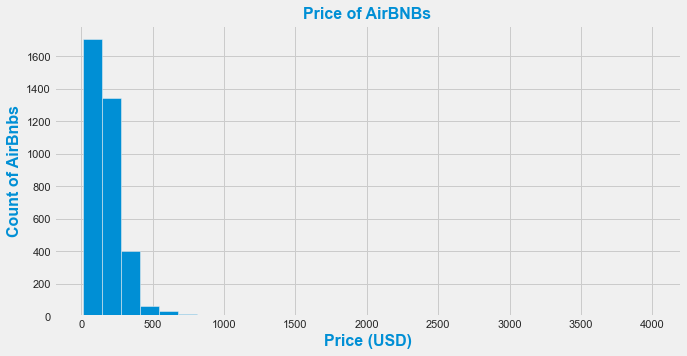

In [224]:
plt.figure(figsize=(10, 5));
df['price'].hist(bins = 30);
plt.title('Price of AirBNBs', size = 16, weight = 'bold', color='C0');
plt.ylabel('Count of AirBnbs', weight = 'bold', size = 16, color='C0');
plt.xlabel('Price (USD)', weight = 'bold', size= 16, color='C0');

In [225]:
df['price'].describe()

count    3582.000000
mean      173.930765
std       148.389339
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

buang outlier untuk visualisasi 

In [226]:
df = df.loc[(df.price <=500) & (df.price>10)]

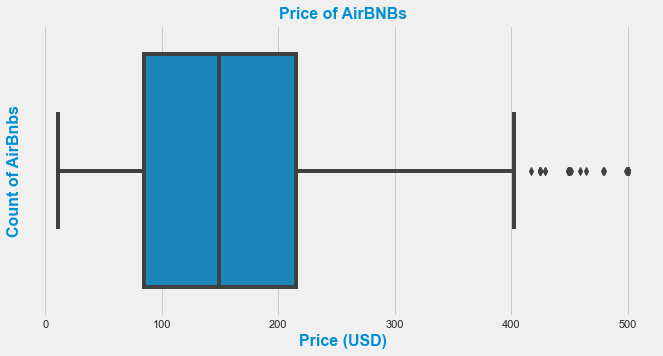

In [227]:
plt.figure(figsize=(10, 5));
sns.boxplot(df['price']);
plt.title('Price of AirBNBs', size = 16, weight = 'bold', color='C0');
plt.ylabel('Count of AirBnbs', weight = 'bold', size = 16, color='C0');
plt.xlabel('Price (USD)', weight = 'bold', size= 16, color='C0');

# Exploring the data - Lets know it better

**** Lingkungan mana yang paling populer di antara daftar?****

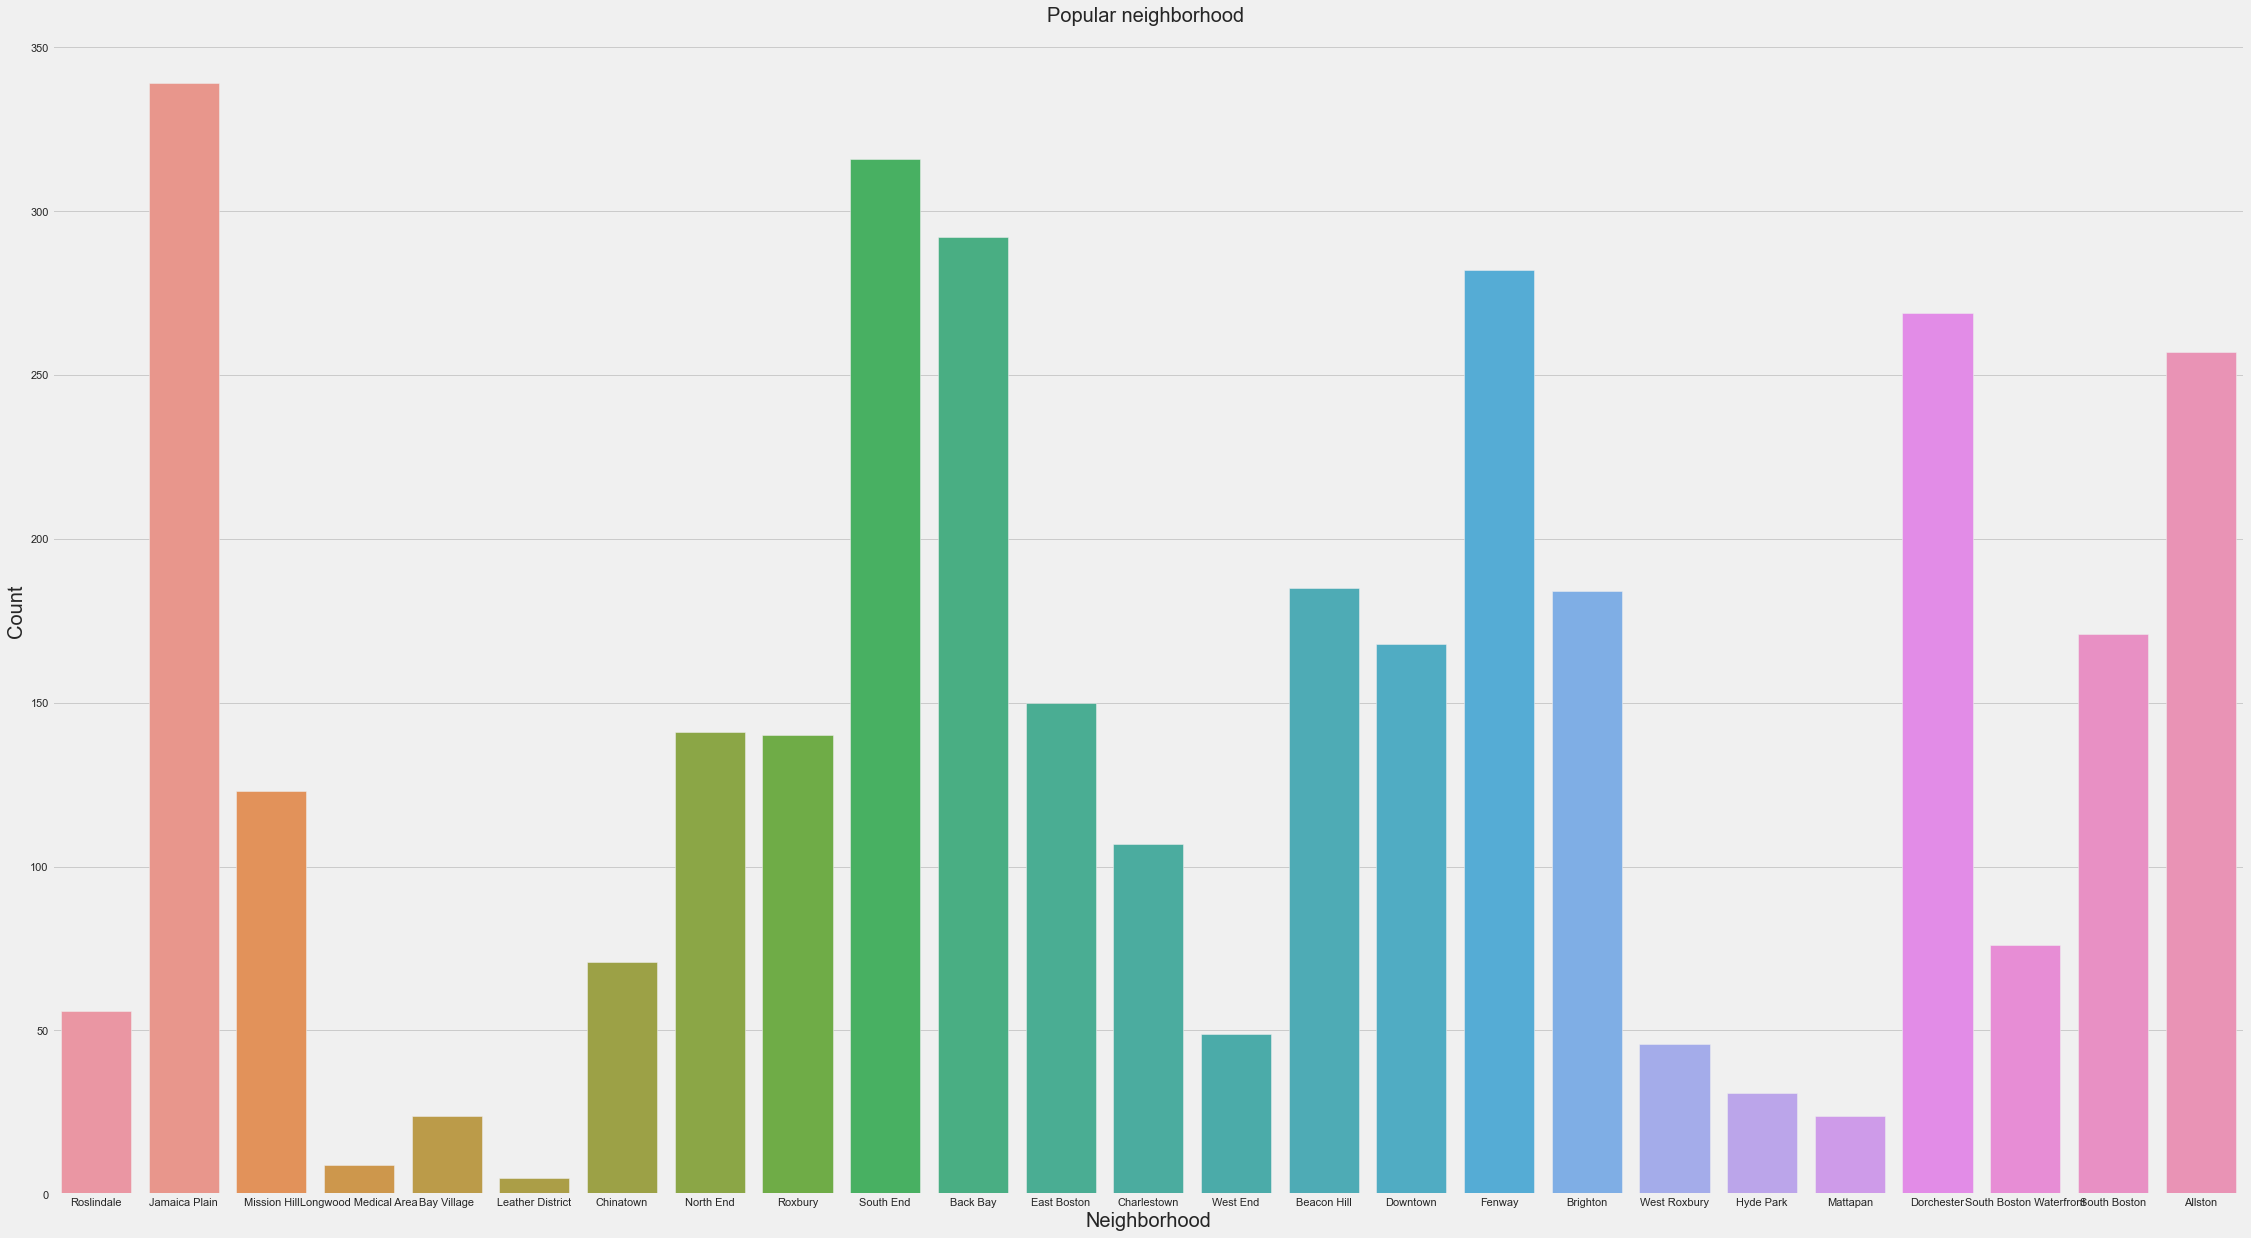

In [228]:
#popular neighborhood groups
plt.figure(figsize=(35,20))
sns.countplot(x="neighbourhood_cleansed", data=df)

#df['neighbourhood_cleansed'].value_counts().plot(kind="bar")
plt.title('Popular neighborhood ',size = 20)
plt.xlabel('Neighborhood' ,size = 20)
plt.ylabel('Count',size = 20)
plt.show()

**Jamaica Plan** dan **South Boston** jelas memenangkan perlombaan untuk lingkungan populer. 

**Jenis kamar mana yang paling banyak ditempati di antara daftar?**

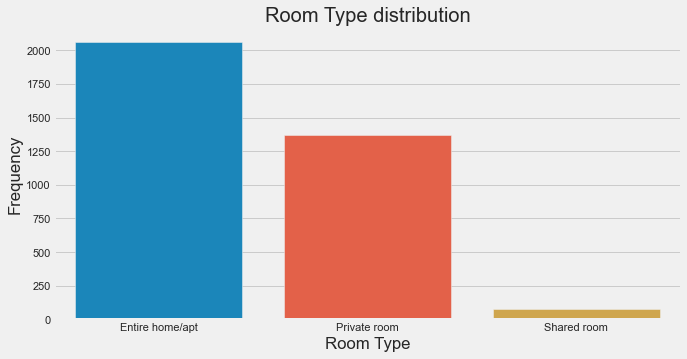

In [229]:
plt.figure(figsize=(10,5))
sns.countplot(x="room_type", data=df)
plt.title('Room Type distribution')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.show()

**Jenis property mana yang paling banyak ditempati di antara daftar**?

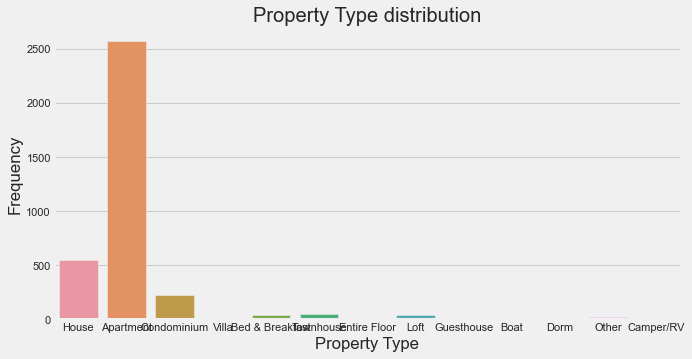

In [230]:
plt.figure(figsize=(10,5))
sns.countplot(x="property_type", data=df)
plt.title('Property Type distribution')
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.show()

apart tertinggi

**Jenis kasur mana yang paling banyak dipakai di antara daftar?**

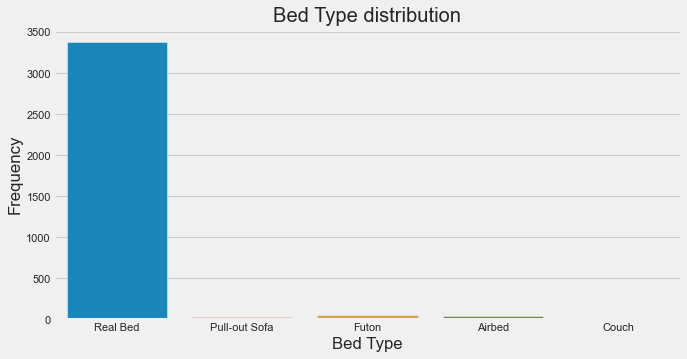

In [231]:
plt.figure(figsize=(10,5))
sns.countplot(x="bed_type", data=df)
plt.title('Bed Type distribution')
plt.xlabel('Bed Type')
plt.ylabel('Frequency')
plt.show()

jenis kasur yang sering di pakai adalah Real bed

**Room type distribution in the neighborhood**

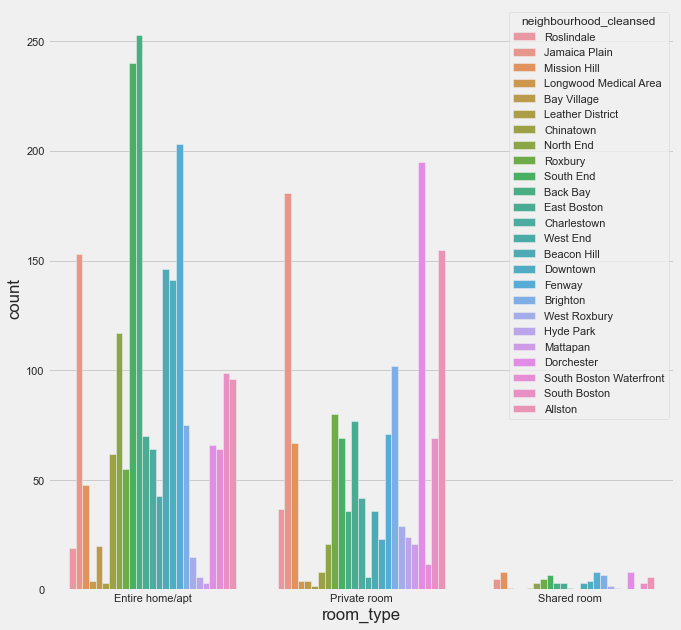

In [203]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="room_type", data=df,hue="neighbourhood_cleansed")

di dalam room Type Entire home/apt tertinggi di lokasi **Back Bay**

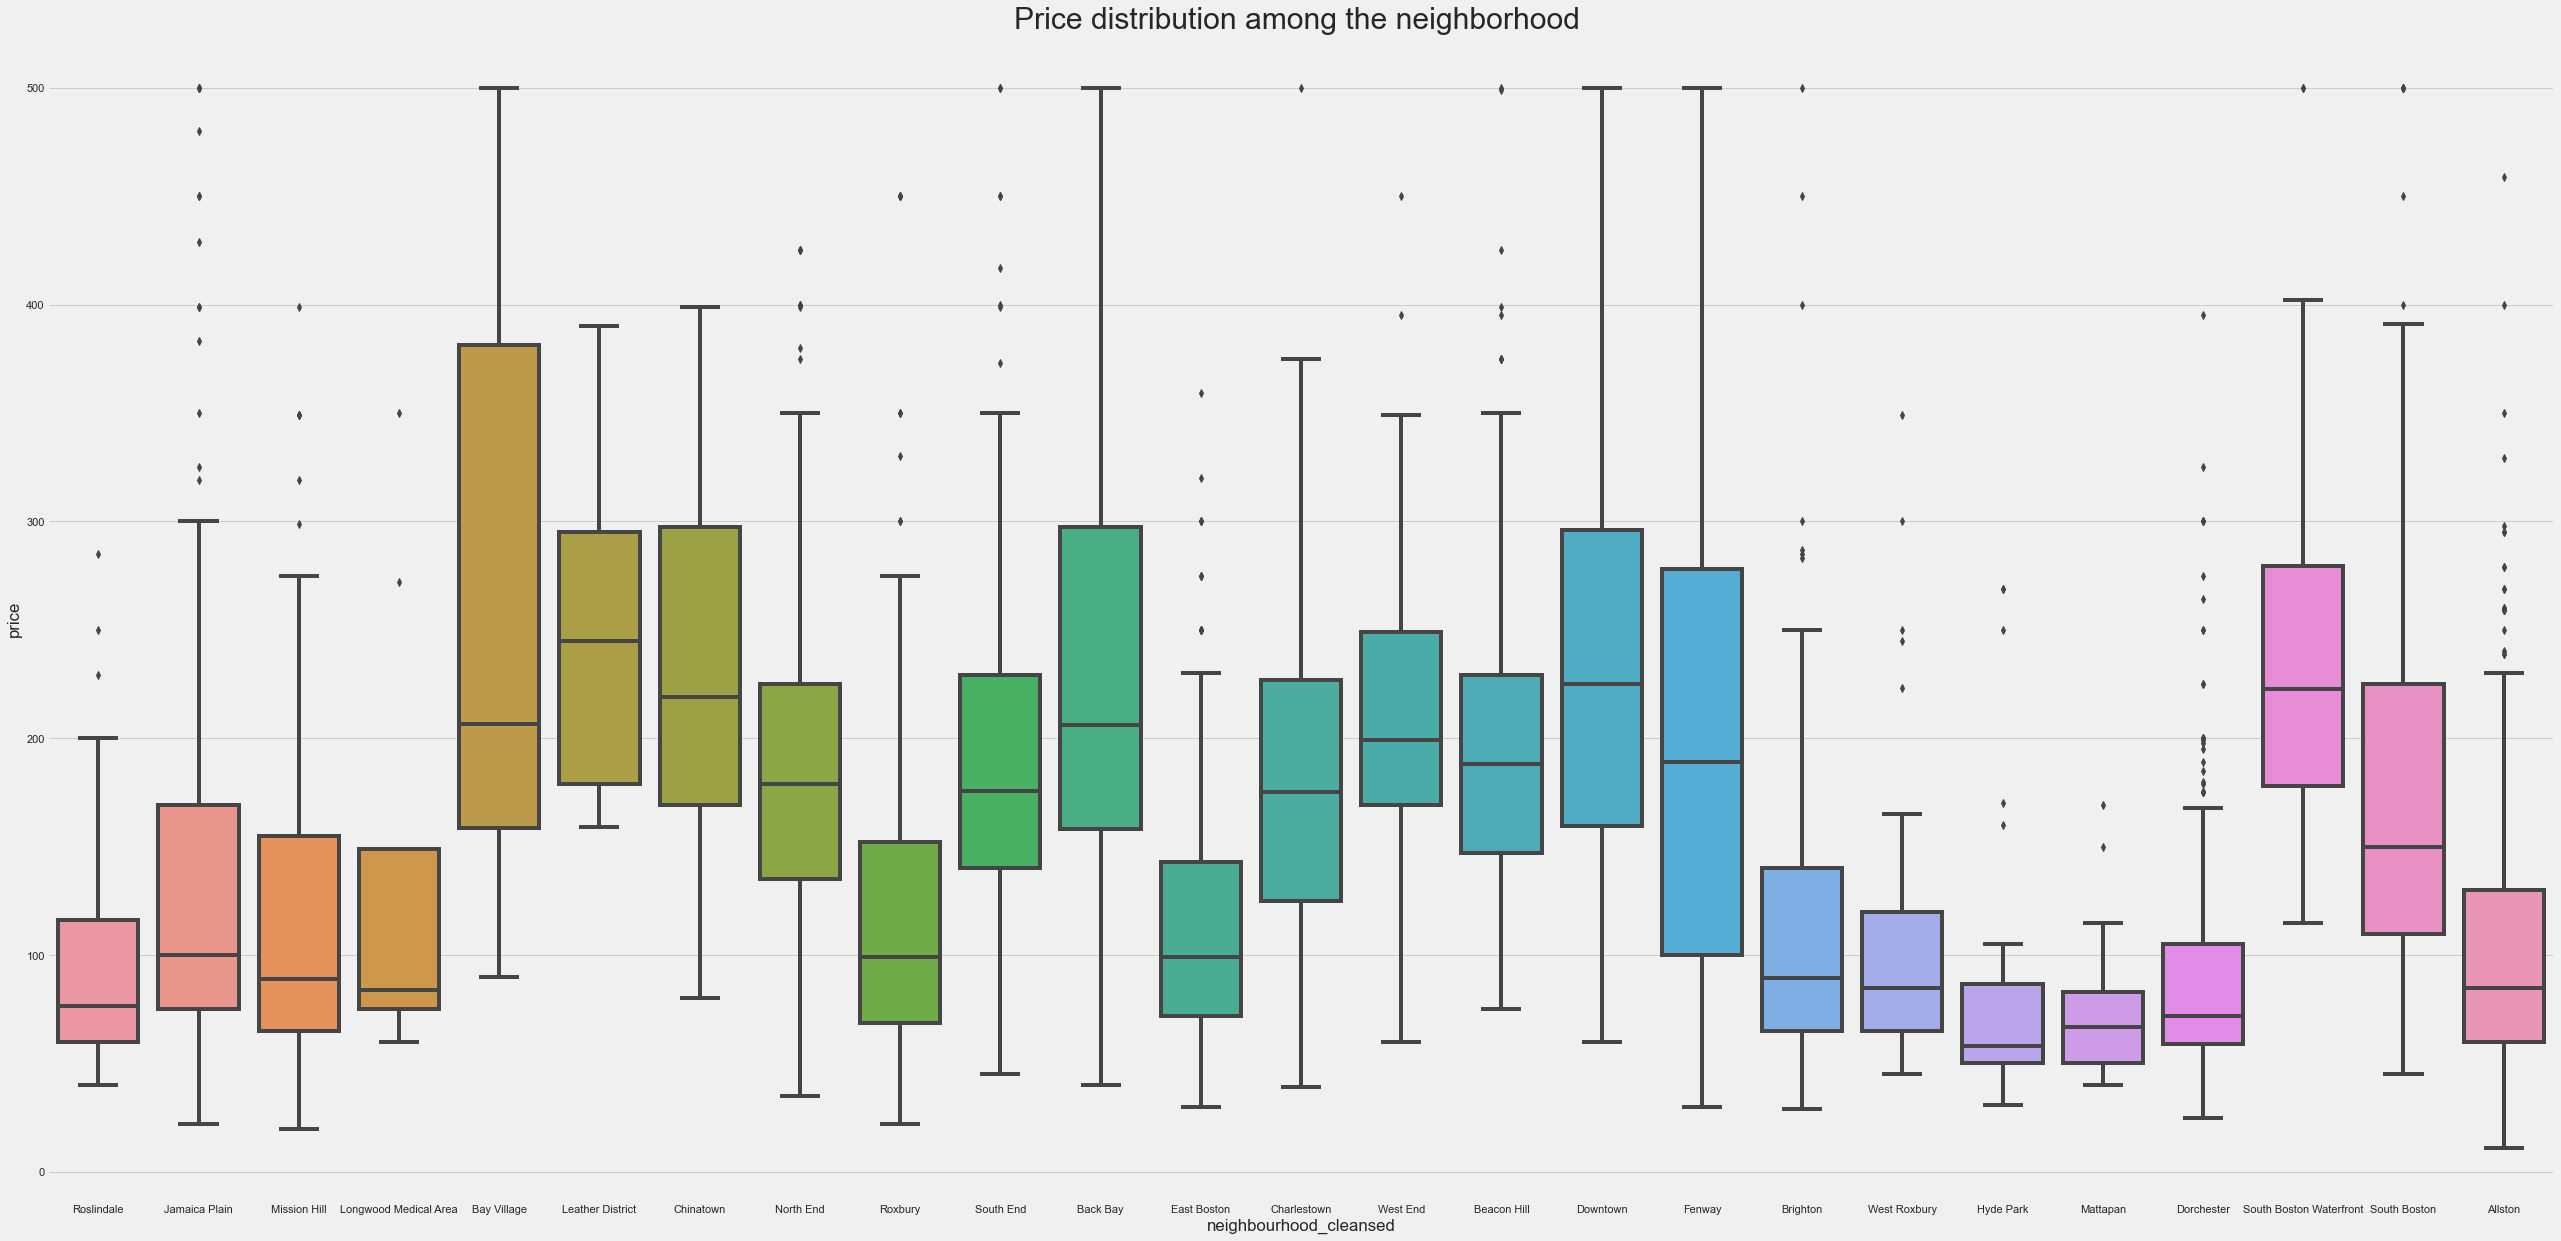

In [204]:
plt.figure(figsize=(40,20))
sns.boxplot(x='neighbourhood_cleansed',y='price',data = df)
plt.title("Price distribution among the neighborhood ",size=30)
plt.show()

From the descriptive stats above, we can see that 75% of the prices are below "300".
We cannot declare that the values above $300 are outliers because pricing depends on the amenities offered and the locations they are present.

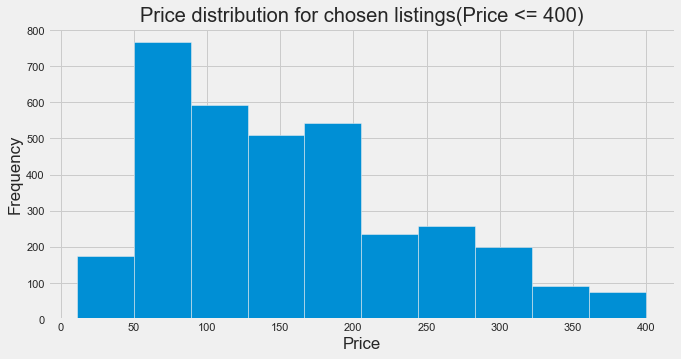

In [235]:
plt.figure(figsize=(10,5))
df = df[df['price'] <= 400]
df.price.plot(kind='hist')
plt.xlabel("Price")
plt.title("Price distribution for chosen listings(Price <= 400)")
plt.show()

Most of the listings are between the price range of 50 to 200

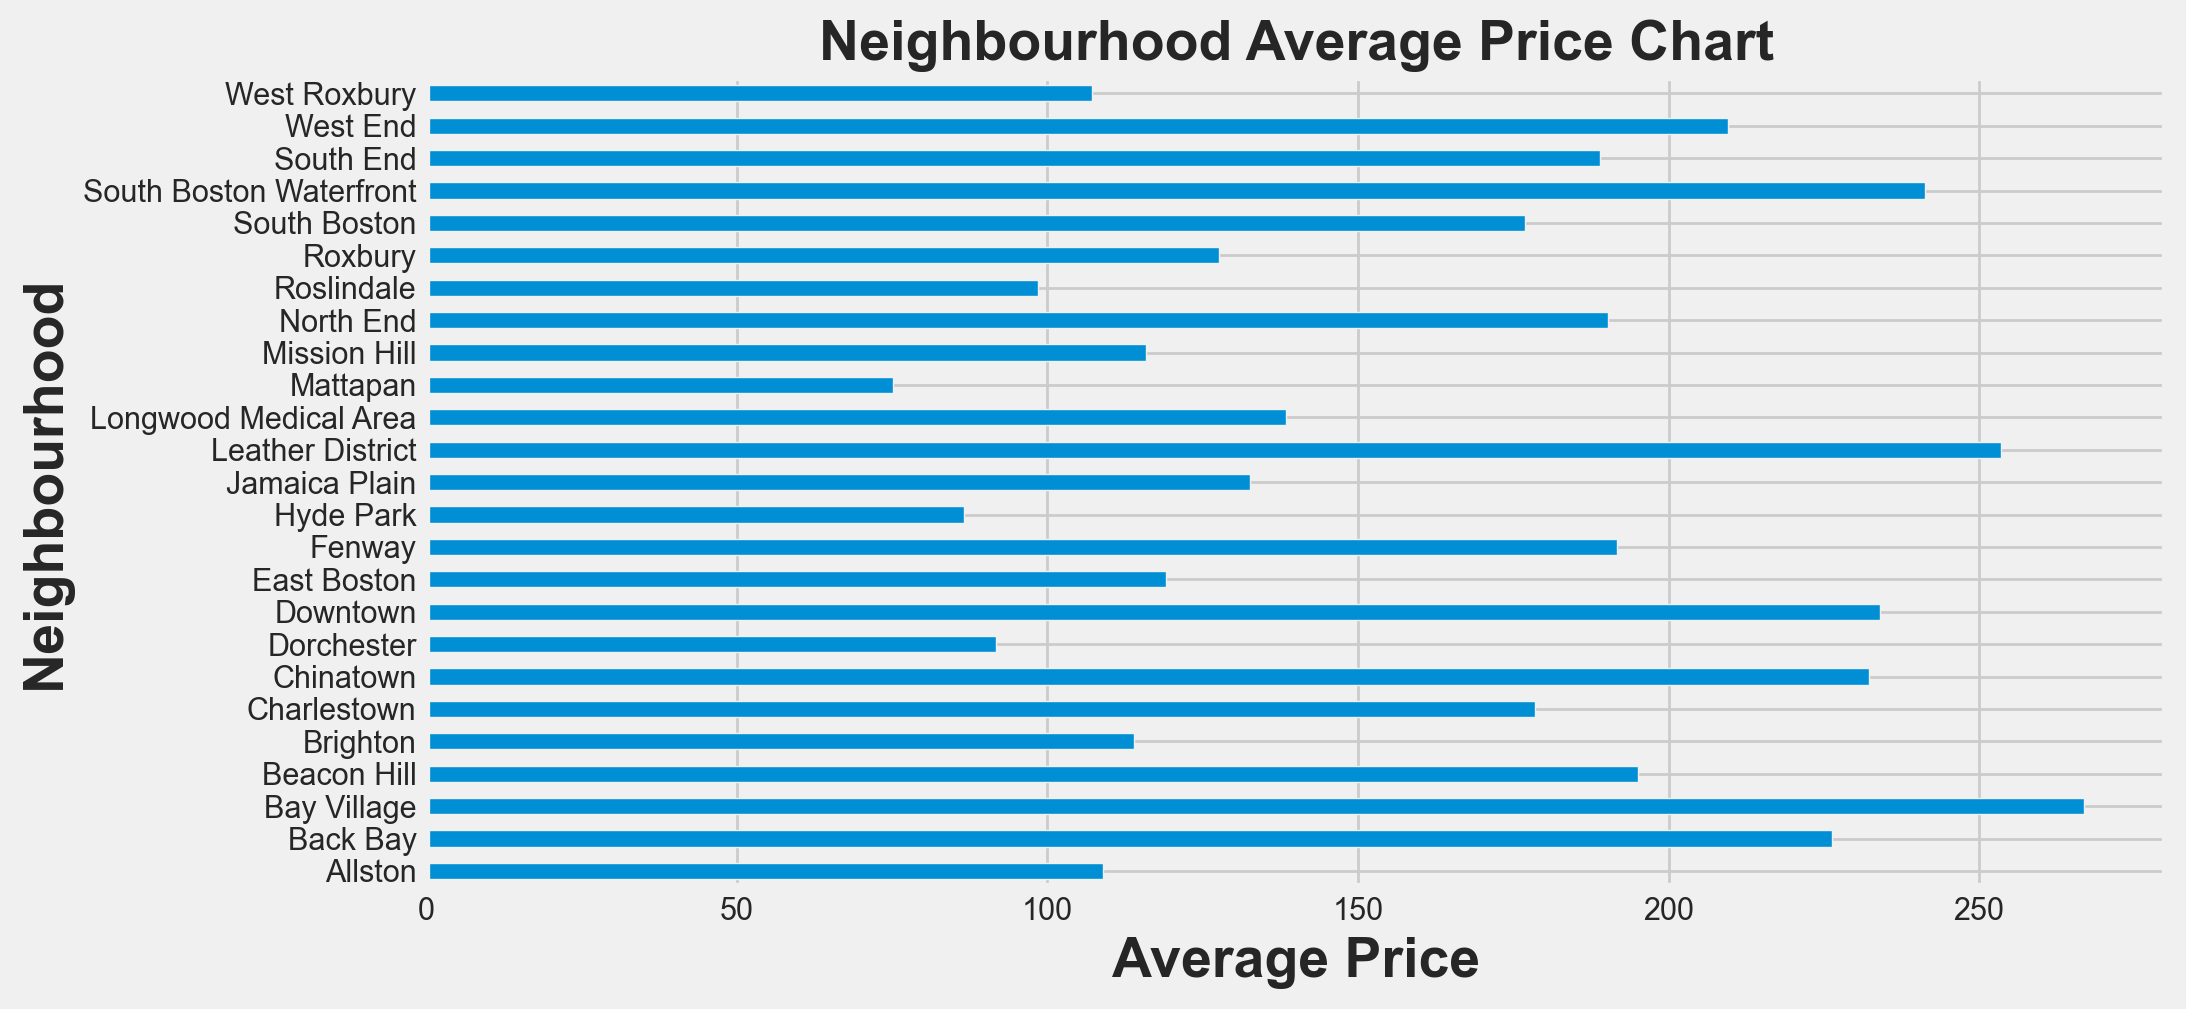

In [205]:
price_per_neighbourhood = df.groupby(['neighbourhood_cleansed']).price.mean()
plt.figure(figsize=(10,5), dpi=200);
price_per_neighbourhood.plot(kind='barh');
plt.xlabel('Average Price', weight='bold', size =20)
plt.ylabel('Neighbourhood', weight = 'bold', size =20)
plt.title('Neighbourhood Average Price Chart', weight ='bold', size = 20)
plt.show()

Jelas, Bay Village dan Leather District adalah yang paling mahal. Daftar Back Bay memiliki kisaran harga rata-rata 270 dolar, sedangkan Leather District memiliki 250 dolar.

**Price range distribution among the room types**

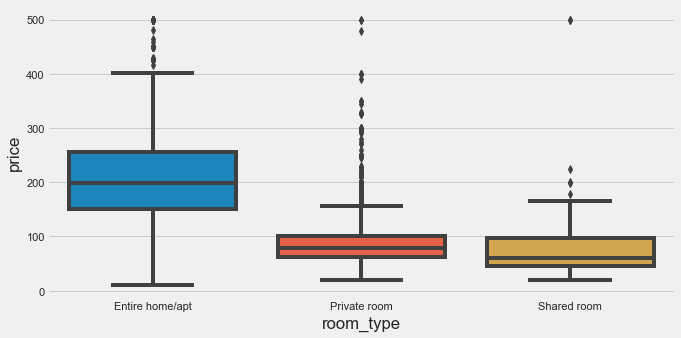

In [206]:
plt.figure(figsize=(10,5))
sns.boxplot(x='room_type',y='price',data = df)
plt.show()

Entire home/apt menduduki harga tertinggi dengan rata2 $200

**Distribution of minimum nights among available room types and neighborhood**

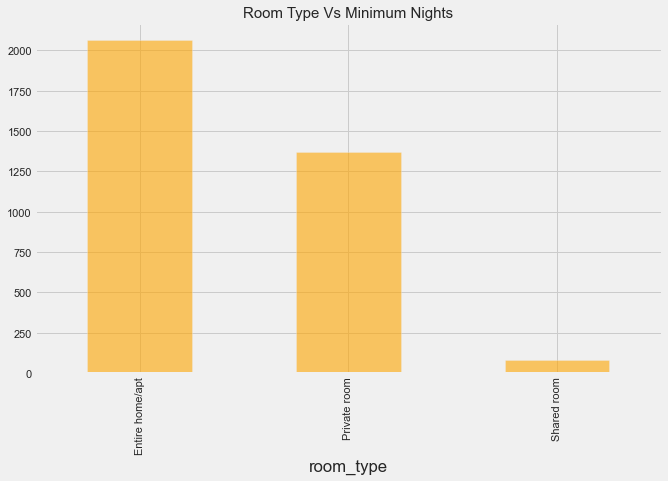

In [216]:
plt.figure(figsize=(10, 6))
plt.subplot()
df.groupby(['room_type']).count()['minimum_nights'].plot(kind='bar',alpha = 0.6,color = 'orange')
plt.title('Room Type Vs Minimum Nights',fontsize=15)
plt.show()

minimum night terbanyak menempatkan pada room tipe jenis entire house/apt

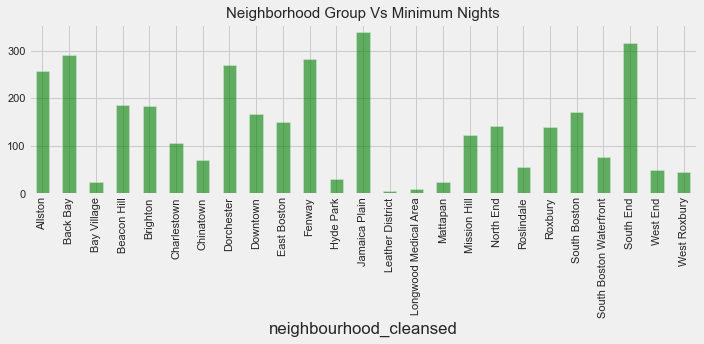

In [215]:
plt.figure(figsize=(10, 5))
plt.subplot()
df.groupby(['neighbourhood_cleansed']).count()['minimum_nights'].plot(kind='bar',alpha = 0.6,color = 'green')
plt.title('Neighborhood Group Vs Minimum Nights',fontsize=15)
plt.tight_layout()
plt.show()

cancel fee terbesar terdapat pada lokasi Bay village dengan Rata-rata **100 dolar**

#### Apa hubungan antara harga dan tipe properti?

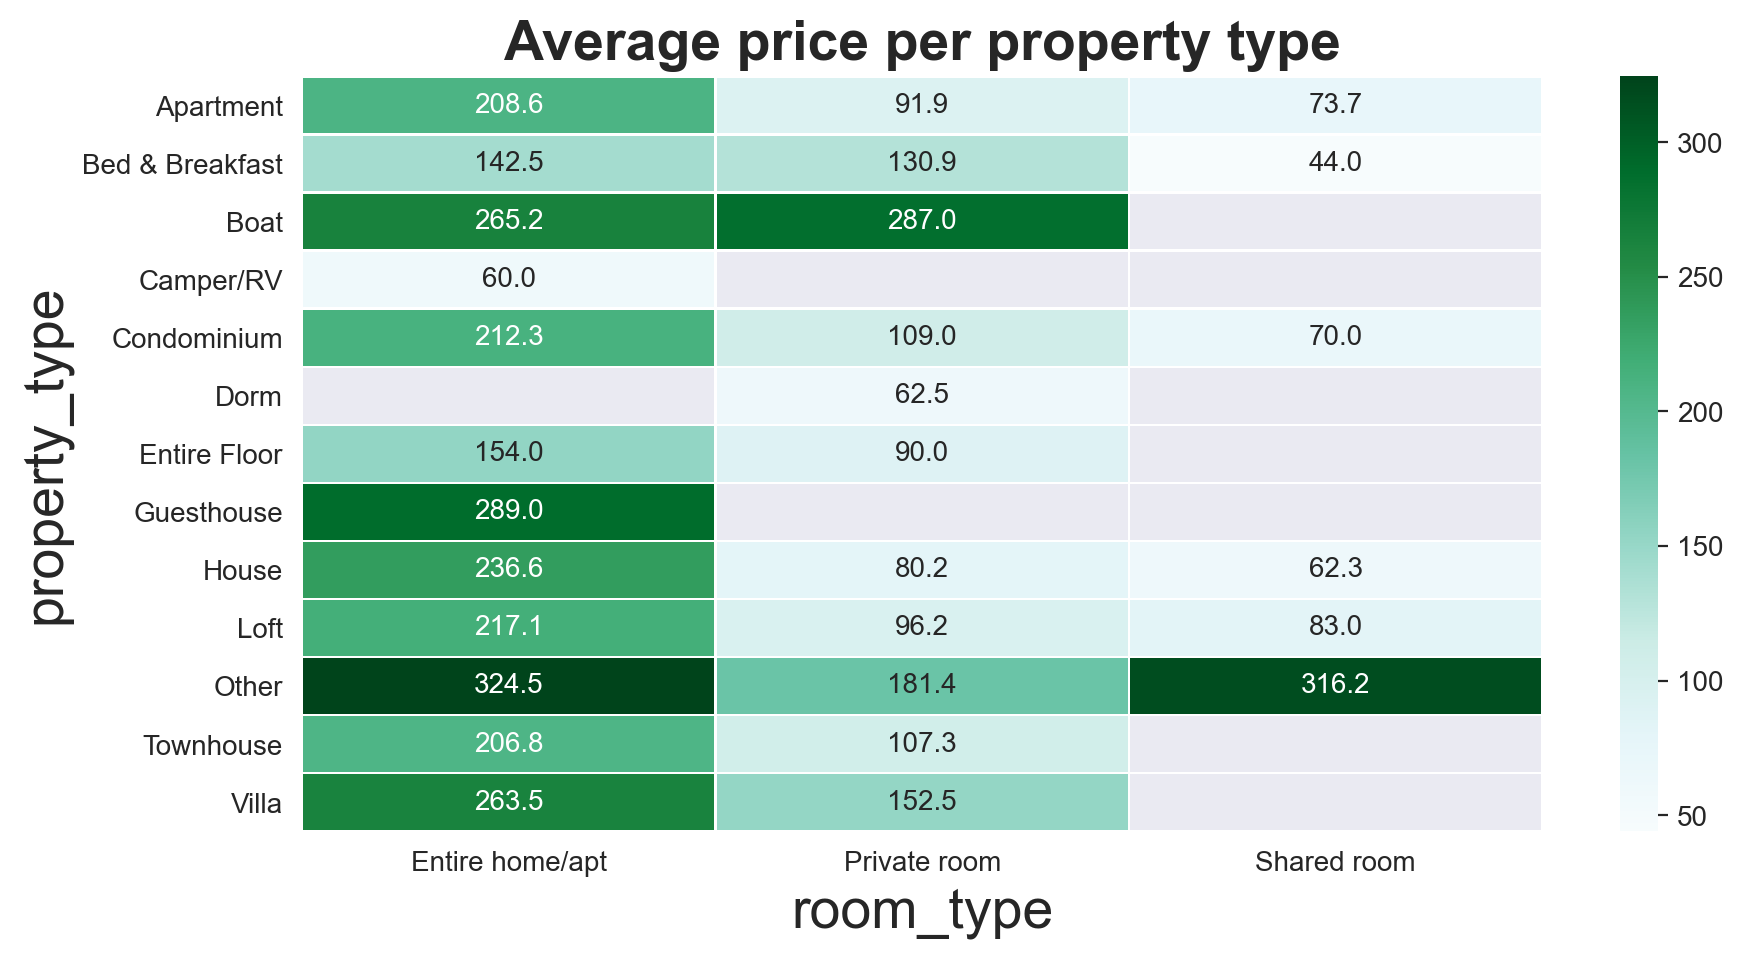

In [121]:
# https://stackoverflow.com/questions/43025097/using-seaborn-heatmap
plt.figure(figsize=(10,5), dpi=200)
plt.title('Average price per property type', weight ='bold', size = 20);
plt.xlabel('room_type', size = 20)
plt.ylabel('property_type', size = 20)
sns.heatmap(df.groupby(['property_type','room_type']).price.mean().unstack(), annot=True, fmt='.1f', linewidths= .5, cmap='BuGn')
plt.show()

heatmap di atas menunjukkan tren umum ketika tipe kamar adalah Seluruh rumah / apartemen, harga umumnya lebih tinggi sementara lebih sedikit untuk kamar bersama

### Thus, we can conclude Bay Village has the highest price amongst other neighbourhoods.

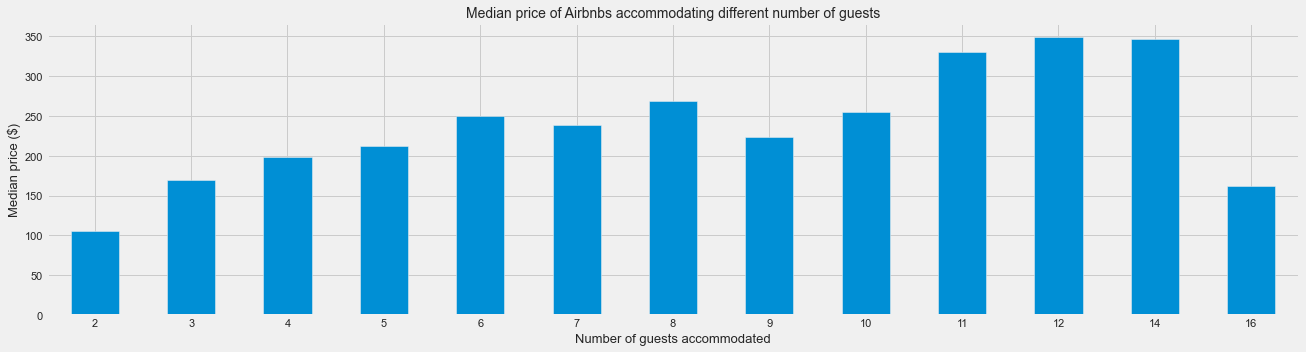

In [237]:
plt.figure(figsize=(20,5))
df.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

akomodasi yang sering menepatkan pada listings sebanyak 12 orang

Cleaning fee 

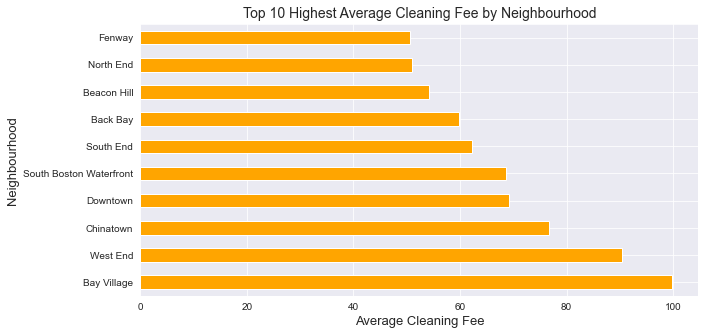

In [128]:
plt.figure(figsize = (10,5))
df.groupby('neighbourhood_cleansed').cleaning_fee.mean().sort_values(ascending = False).iloc[:10].plot(kind='barh', color='orange')
plt.title('Top 10 Highest Average Cleaning Fee by Neighbourhood', fontsize=14)
plt.ylabel('Neighbourhood', fontsize= 13)
plt.xlabel('Average Cleaning Fee', fontsize= 13)
plt.show()

extra people

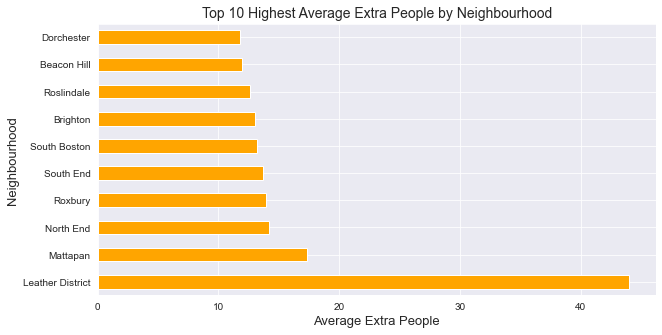

In [131]:
plt.figure(figsize = (10,5))
df.groupby('neighbourhood_cleansed').extra_people.mean().sort_values(ascending = False).iloc[:10].plot(kind='barh', color='orange')
plt.title('Top 10 Highest Average Extra People by Neighbourhood', fontsize=14)
plt.ylabel('Neighbourhood', fontsize= 13)
plt.xlabel('Average Extra People', fontsize= 13)
plt.show()

##### AMINITIES X PRICE

Security deposit

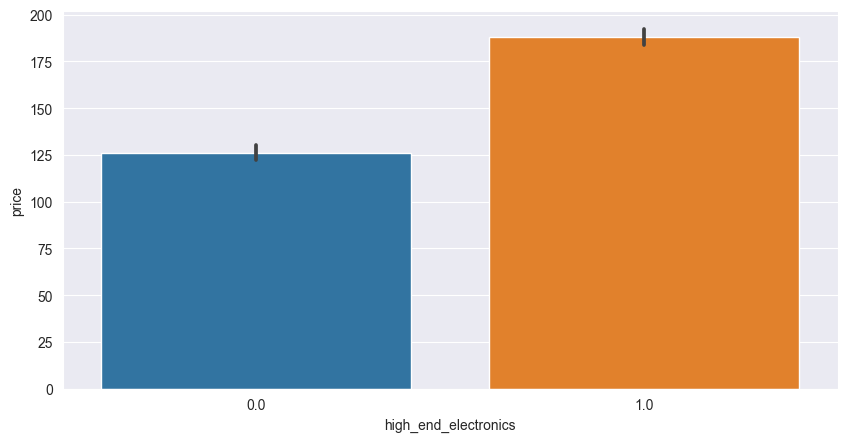

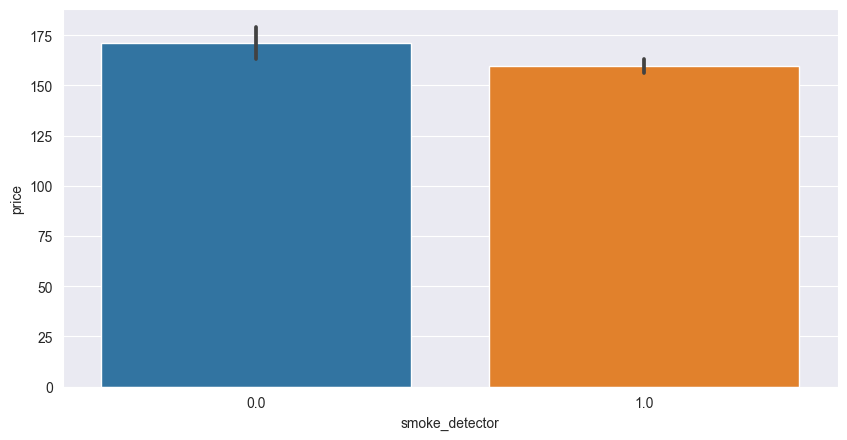

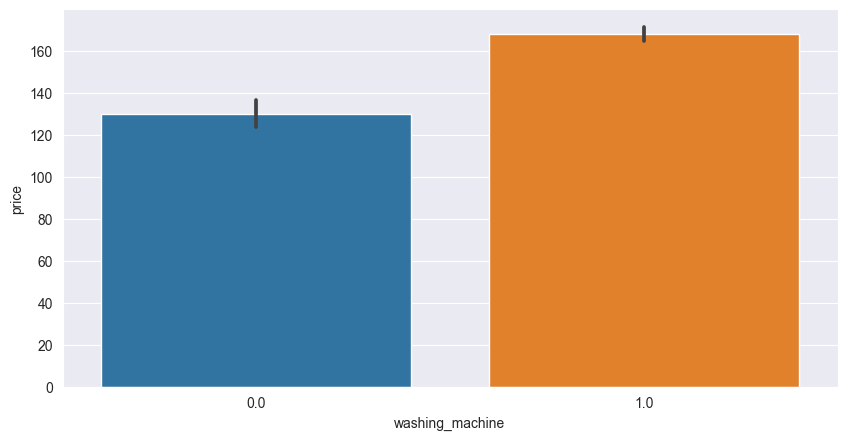

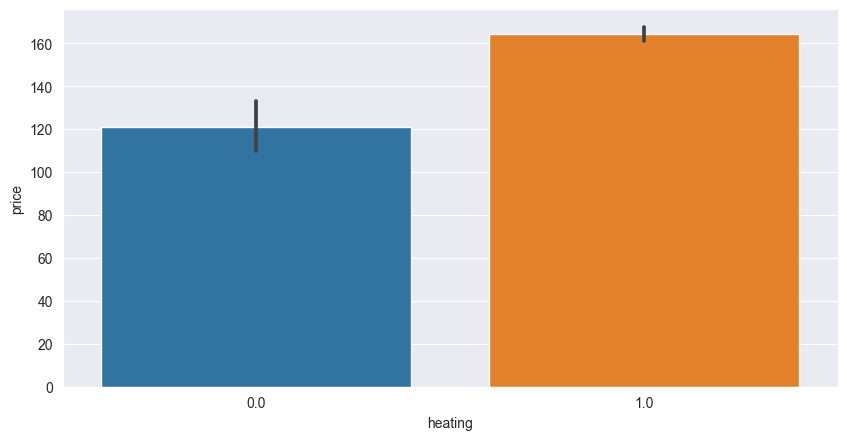

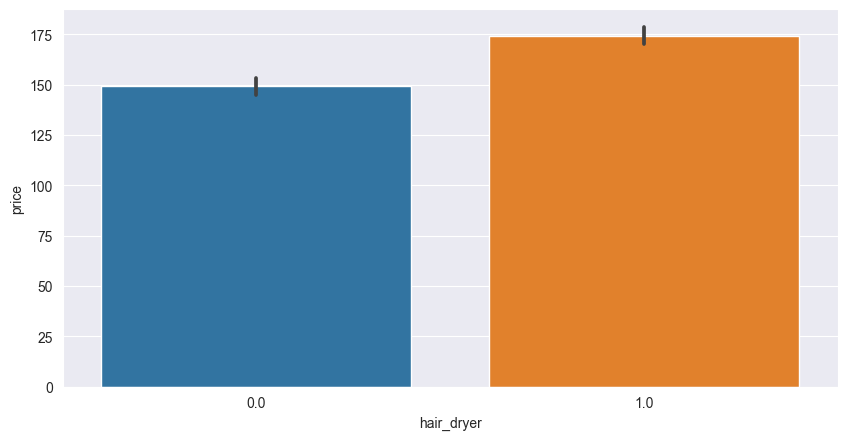

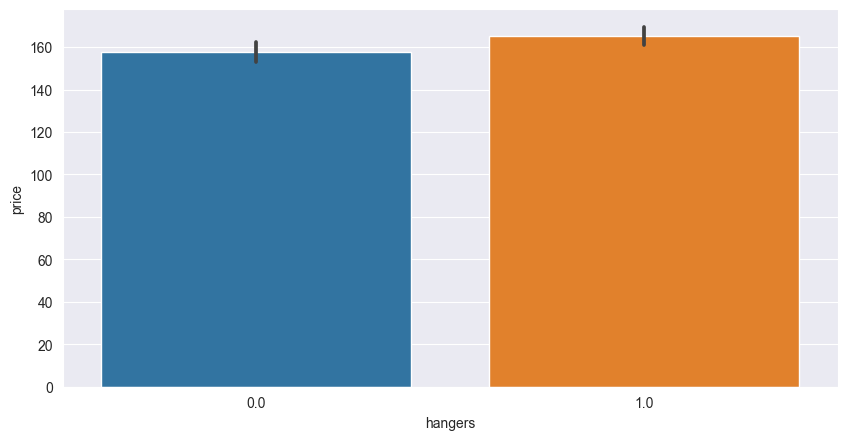

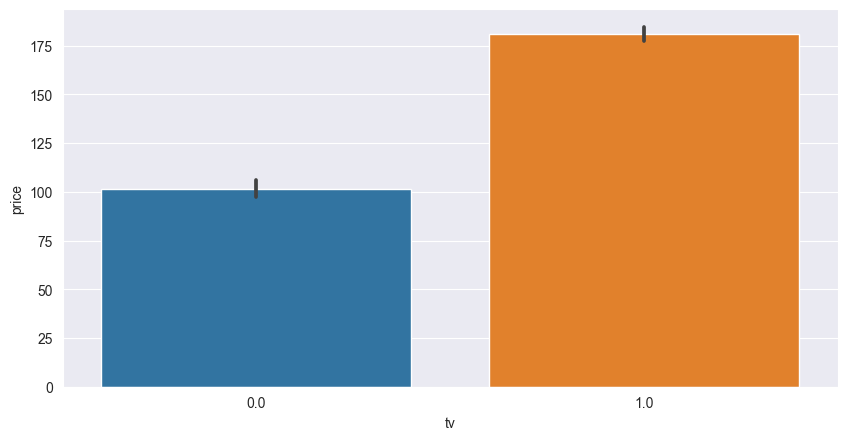

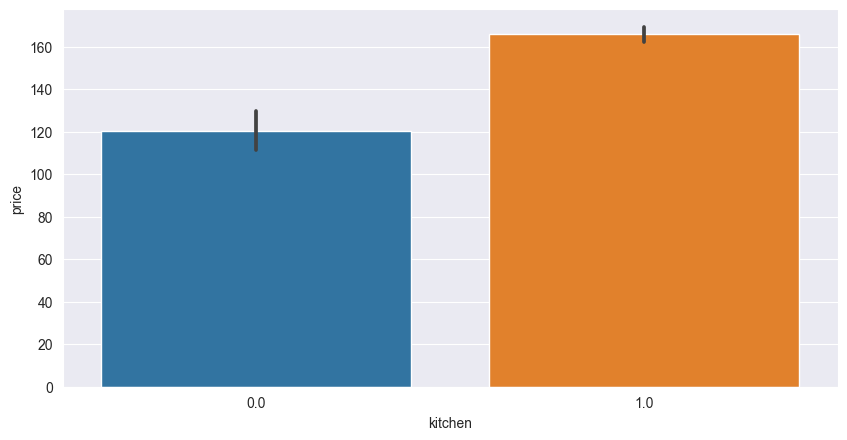

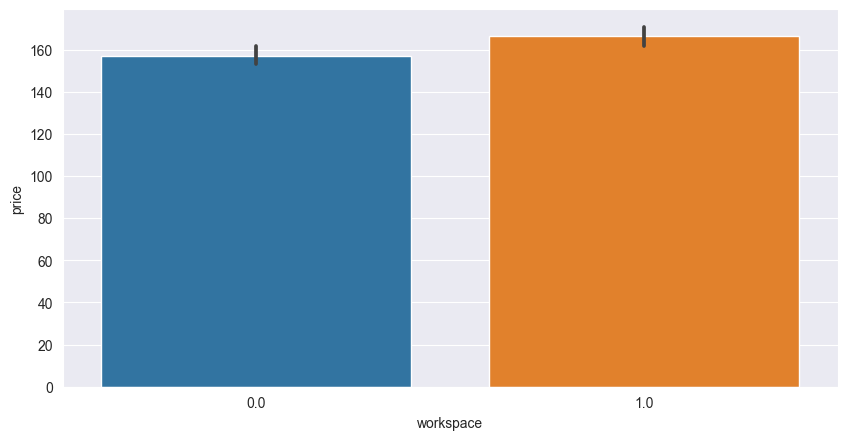

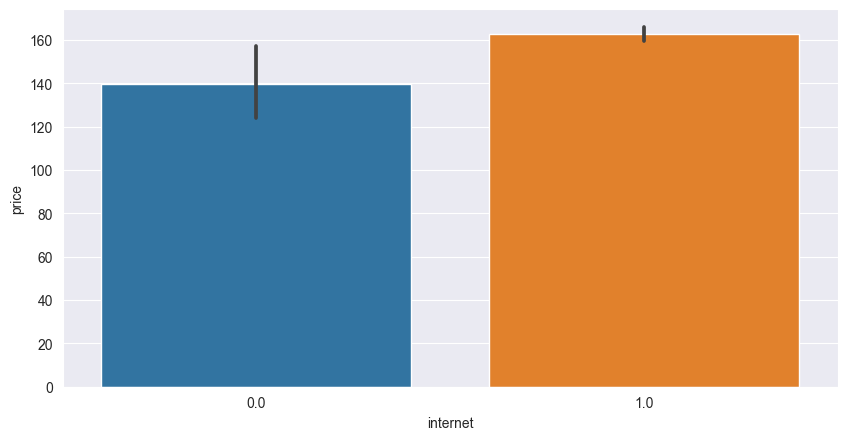

In [129]:
for col in df.iloc[:,16:-1].columns:
        fig, ax = plt.subplots(figsize=(10,5), dpi=100)  
        sns.barplot(x= col, y='price', data=df) #https://seaborn.pydata.org/generated/seaborn.barplot.htmlbinary_count_and_price_plot(col, figsize=(20,3))

In [130]:
df.to_csv('listings_visual.csv', index=False)

# **Insights developed :**
* kota yang populer belum tentu menjadikan harga yang tertinggi, dapa di lihat perpopuler adalah Jamaica Plan tetapi kota yang termahal Bay Village.
* Seluruh Rumah adalah tipe kamar entire home/aprt yang sangat padat diikuti oleh kamar Pribadi dan Bersama.
* Bay Village dan Leather District adalah yang paling mahal. Daftar Back Bay memiliki kisaran harga rata-rata 270 dolar, sedangkan Leather District memiliki 250 dolar.
* Back Bay memiliki jumlah listing Seluruh Rumah dan Kamar Bersama yang tinggi. Brooklyn memiliki pemesanan kamar pribadi yang tinggi.
* minimum night tertinggi terlihat pada kota yang terpoper yaitu Jamaica Plan
* 75% dari harga listing di bawah **300 dolar**.
* data menunjukkan tren umum ketika tipe kamar adalah Seluruh rumah / apartemen, harga umumnya lebih tinggi sementara lebih sedikit untuk kamar bersama.
* jumlah akomodasi yang sering mencantumkan pada listings sebanyak 12 orang
* minimum night terbanyak menempatkan pada room tipe jenis entire house/apt
* cancel fee terbesar terdapat pada lokasi Bay village dengan Rata-rata **100 dolar**
* High end electronics , tv, dan heating menempati fasilitas yang menunjukan perbedaan harga yg jauh di banding kna tidak memakai fasilitas tersebut.
* extra people fee terbesar terlihat di kota Leather District,dengan rata-rata di atas kota lain dengan yg di bawah **20 dolar**
